In [3]:
import dandelion as ddl
import pandas as pd
import scanpy as sc
import numpy as np
import warnings
import os
import milopy.core as milo

## Fetal Bcell Gene Expression Data

Firstly, we read in the data generated from pre-processing step.

We use a negative filter to select out the B Cells we do not want in the dataset.

In [126]:
preprocessed_GEXdata = sc.read(os.getcwd() + "/write/BCR_contigs.h5ad")


In [127]:
preprocessed_GEXdata

AnnData object with n_obs × n_vars = 29818 × 1632
    obs: 'n_counts', 'n_genes', 'file', 'mito', 'doublet_scores', 'predicted_doublets', 'old_annotation_uniform', 'organ', 'Sort_id', 'age', 'method', 'donor', 'sex', 'Sample', 'scvi_clusters', 'is_maternal_contaminant', 'anno_lvl_2_final_clean', 'celltype_annotation', 'filter_rna', 'has_contig', 'filter_contig_quality', 'filter_contig_VDJ', 'filter_contig_VJ', 'contig_QC_pass', 'filter_contig', 'clone_id', 'clone_id_by_size', 'sample_id', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_genotyped_VDJ', 'v_call_genotyped_VJ', 'd_call_VDJ', 'j_call_VDJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'duplicate_count_VDJ', 'duplicate_count_VJ', 'duplicate_count_VDJ_1', 'duplicate_count_VJ_1', 'duplicate_count_VDJ_2', 'duplicate_count_VDJ_3', 'junction_aa_VDJ', 'junction_aa_VJ', 'locus_status', 'locus_status_summary', 'productive', 'productive_summary', 'isotype', 'isotype_summary', 'vdj_status', 'vdj_status_summary', 'constan

To perform the pseudobulking, we run `ddl.tl.setup_vdj_pseduobulk()`.
We set `productive_vdj` and `productive_vj` to `False`. This remove cells where the VDJ/Vj chains are not productive.

In [128]:
GEX_adata = ddl.tl.setup_vdj_pseudobulk(preprocessed_GEXdata, mode="B",
#                                       productive_cols = ["productive_VDJ", "productive_VJ"]
                                        productive_vdj = False,
                                        productive_vj = False
                                       )

We explore the pseudobulk `GEX_adata` object to check how many rows of cells it has. 

In [129]:
GEX_adata

AnnData object with n_obs × n_vars = 9625 × 1632
    obs: 'n_counts', 'n_genes', 'file', 'mito', 'doublet_scores', 'predicted_doublets', 'old_annotation_uniform', 'organ', 'Sort_id', 'age', 'method', 'donor', 'sex', 'Sample', 'scvi_clusters', 'is_maternal_contaminant', 'anno_lvl_2_final_clean', 'celltype_annotation', 'filter_rna', 'has_contig', 'filter_contig_quality', 'filter_contig_VDJ', 'filter_contig_VJ', 'contig_QC_pass', 'filter_contig', 'clone_id', 'clone_id_by_size', 'sample_id', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_genotyped_VDJ', 'v_call_genotyped_VJ', 'd_call_VDJ', 'j_call_VDJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'duplicate_count_VDJ', 'duplicate_count_VJ', 'duplicate_count_VDJ_1', 'duplicate_count_VJ_1', 'duplicate_count_VDJ_2', 'duplicate_count_VDJ_3', 'junction_aa_VDJ', 'junction_aa_VJ', 'locus_status', 'locus_status_summary', 'productive', 'productive_summary', 'isotype', 'isotype_summary', 'vdj_status', 'vdj_status_summary', 'constant

In [130]:
GEX_adata.obs

,n_counts,n_genes,file,mito,doublet_scores,predicted_doublets,old_annotation_uniform,organ,Sort_id,age,...,c_call_VJ_main,v_call_B_VDJ_main,d_call_B_VDJ_main,j_call_B_VDJ_main,v_call_B_VJ_main,j_call_B_VJ_main,isotype_status,chain_status,rearrangement_status_VDJ,rearrangement_status_VJ
index,,,,,,,,,,,,,,,,,,,,,
Human_colon_16S8159187-AGCTCTCAGTGTACTC,12236.0,2627,Human_colon_16S8159187,0.032772,0.293388,True,nan,GU,CD45P_CD45N,15,...,IGKC,IGHV3-33,None,IGHJ3,IGKV4-1,IGKJ2,IgM,Single pair,standard,standard
Human_colon_16S8159187-GCGCCAAGTAGATTAG,4774.0,1354,Human_colon_16S8159187,0.075408,0.136000,False,nan,GU,CD45P_CD45N,15,...,IGLC3,IGHV4-59,IGHD7-27,IGHJ4,IGLV1-44,IGLJ3,IgM,Single pair,standard,standard
Human_colon_16S8159187-CGGACACCAGGTTTCA,4751.0,1071,Human_colon_16S8159187,0.063355,0.112676,False,nan,GU,CD45P_CD45N,15,...,IGLC1,IGHV3-53,None,IGHJ2,IGLV2-14,IGLJ1,IgM,Extra pair,standard,Multi
Human_colon_16S8159187-TACACGAAGAGCCCAA,4683.0,1335,Human_colon_16S8159187,0.031390,0.109792,False,nan,GU,CD45P_CD45N,15,...,IGKC,IGHV5-10-1,"IGHD1-7,IGHD1-20,IGHD1/OR15-1a",IGHJ5,IGKV3-20,IGKJ5,IgM,Single pair,standard,standard
Human_colon_16S8159187-GTACGTATCTGTCCGT,4124.0,1613,Human_colon_16S8159187,0.015761,0.077662,False,nan,GU,CD45P_CD45N,15,...,IGKC,IGHV3-53,IGHD7-27,IGHJ3,IGKV1D-8,IGKJ4,IgM,Extra pair,standard,standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FCAImmP7803020-ATGTGTGTCCCTTGCA,2097.0,854,FCAImmP7803020,0.021936,0.022517,False,B CELL,SP,CD45P,15,...,IGKC,IGHV1-3,None,IGHJ6,IGKV5-2,IGKJ1,IgM,Extra pair,standard,Multi
FCAImmP7803020-ACGATACCAAGCCGTC,2088.0,707,FCAImmP7803020,0.038314,0.019011,False,nan,SP,CD45P,15,...,IGKC,IGHV3-21,None,IGHJ2,IGKV4-1,IGKJ5,Multi,Extra pair,Multi,Multi
FCAImmP7803020-GGATTACCAGATCCAT,2077.0,811,FCAImmP7803020,0.050072,0.014286,False,nan,SP,CD45P,15,...,IGKC,IGHV3-7,None,IGHJ3,IGKV1-5,IGKJ2,IgM,Extra pair,Multi,Multi


We check the number of cells of each type.

In [121]:
GEX_adata.obs["celltype_annotation"].value_counts()

MATURE_B       4482
SMALL_PRE_B    1980
B1             1551
IMMATURE_B      640
CYCLING_B       445
LARGE_PRE_B     435
LATE_PRO_B       58
PLASMA_B         13
PRO_B            12
PRE_PRO_B         9
Name: celltype_annotation, dtype: int64

We filter out cells that are not relevant to our analysis and check number of cells leftover.

In [122]:
# negative filtering
GEX_adata = GEX_adata[~GEX_adata.obs["celltype_annotation"].isin(["CYCLING_B", "B1", "MATURE_B", "PLASMA_B", "LATE_PRO_B", "PRO_B", "PRE_PRO_B"])] 
# GEX_adata = GEX_adata[~GEX_adata.obs["celltype_annotation"].isin(["CYCLING_B", "B1", "MATURE_B"])] 



In [123]:
GEX_adata.obs["celltype_annotation"].value_counts()

SMALL_PRE_B    1980
IMMATURE_B      640
LARGE_PRE_B     435
Name: celltype_annotation, dtype: int64

We compute a neighborhood graph of observations. `n_neighbors` is the size of the neighborhood (ie. the local number of data points) used for manifold approximation (UMAP).

In [46]:
# sc.pp.neighbors(GEX_adata, use_rep="X_scvi", n_neighbors=30)
sc.pp.neighbors(GEX_adata, use_rep="X_scvi", n_neighbors=50)


We use milopy to assign cells to neighbourhoods

In [47]:
milo.make_nhoods(GEX_adata, prop=0.1)

We used Matplot to check the histogram plot for the neighborhood sizes

(array([ 2.,  0.,  4.,  1.,  1.,  3.,  0.,  3.,  1.,  2.,  0.,  6.,  1.,
         5.,  1.,  3.,  8.,  3.,  6.,  5.,  4.,  6.,  9.,  2.,  6.,  4.,
         6.,  8.,  6.,  3.,  1.,  4.,  1.,  5.,  4.,  7.,  3.,  6.,  5.,
         3.,  3.,  0.,  4.,  2., 13.,  5.,  3.,  2.,  1.,  1.,  9.,  0.,
         1.,  2.,  4.,  4.,  0.,  1.,  2.,  2.,  1.,  3.,  1.,  0.,  3.,
         1.,  1.,  1.,  0.,  0.,  1.,  0.,  3.,  0.,  1.,  0.,  1.,  1.,
         0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 55.        ,  56.18000031,  57.36000061,  58.54000092,
         59.72000122,  60.90000153,  62.08000183,  63.25999832,
         64.44000244,  65.62000275,  66.80000305,  67.98000336,
         69.16000366,  70.33999634,  71.51999664,  72.69999695,
         73.87999725,  75.05999756,  76.23999786,  77.41999817,
         78.59999847,  79.77999878,  80.95999908,  82.13999939,
         83.31999969,  84.5       ,  85.68000031, 

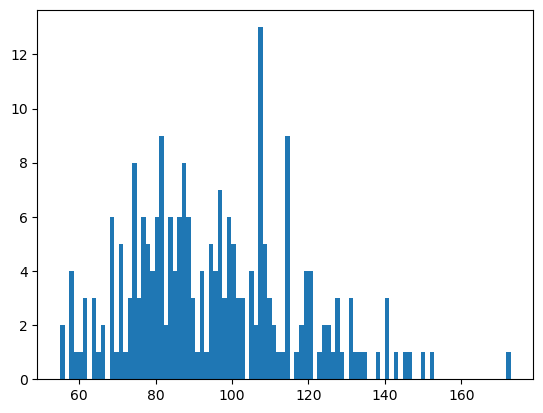

In [48]:
import matplotlib.pyplot as plt
nhood_size = np.array(GEX_adata.obsm["nhoods"].sum(0)).ravel()
plt.hist(nhood_size, bins = 100)

We compute the neighborhood graph to generate a UMAP. The cell-by-pseudobulk matrix is saved into `pb_GEX_adata.obsm["nhoods"]`

In [49]:
sc.tl.umap(GEX_adata)

The cell type annotation is stored in `obs["celltype_annotation"]`. We use the following function  to create the pseudobulk vdj feature space.

In [50]:
pb_GEX_adata = ddl.tl.vdj_pseudobulk(
    GEX_adata, pbs=GEX_adata.obsm["nhoods"], obs_to_take="celltype_annotation", mode="B", extract_cols=None
)

C:\Users\chris\anaconda\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.


We check `pb_GEX_adata` for the number of pseudobulks. There are 228 pseudobulks.

In [51]:
pb_GEX_adata

AnnData object with n_obs × n_vars = 228 × 177
    obs: 'celltype_annotation', 'celltype_annotation_fraction', 'cell_count'
    obsm: 'pbs'

We compute the PCA loadings and plot PC1 & PCA and an overview of PC loadings. There are three colors indicating the Celltype Annotation: Immature B, Large Pre-B, and Small Pre-B.

C:\Users\chris\anaconda\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


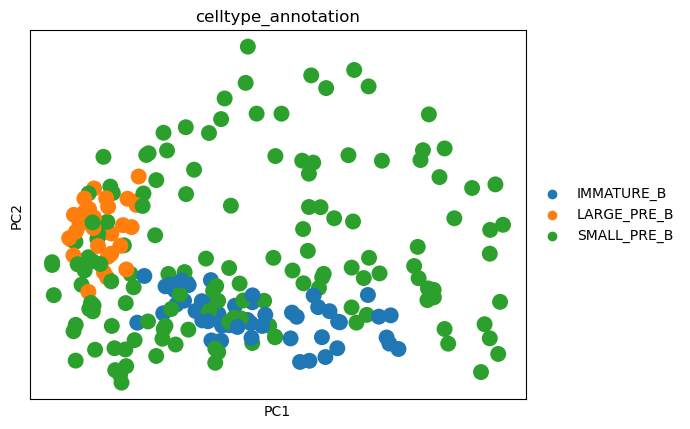

In [52]:
# compute PCA

sc.tl.pca(pb_GEX_adata) # compute PCA coordinates, loadings and variance
sc.pl.pca(pb_GEX_adata, color="celltype_annotation")
# sc.pl.pca_overview(pb_GEX_adata)

We generate a UMAP as well. This allows us to compare with the UMAP plot so we can pick the best rootcell and terminal cell for the trajectory inference.

C:\Users\chris\anaconda\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


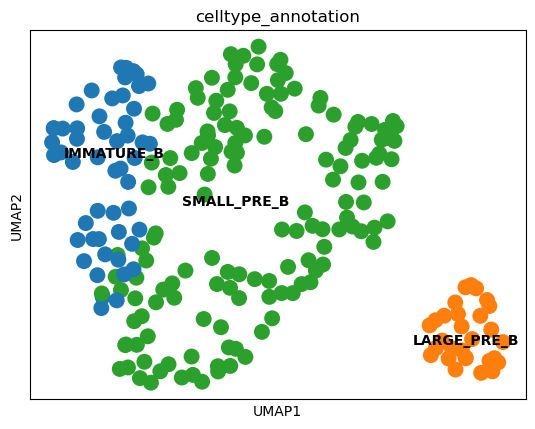

In [54]:
sc.pp.neighbors(pb_GEX_adata)
sc.tl.umap(pb_GEX_adata)
sc.pl.umap(pb_GEX_adata, color = "celltype_annotation", legend_loc="on data")

The dimension reduction analysis was also re-run using different subsets of cells from the same dataset. We re-ran the initial steps but with `Cycling B, B1, and Mature B` removed. This was conducted to examine and compare clusters in PCA & UMAP to see which one was the most distinct so the correct rootcell and terminal cells could be selected. 

In [137]:
preprocessed_GEXdata = sc.read(os.getcwd() + "/write/BCR_contigs.h5ad")

GEX_adata = ddl.tl.setup_vdj_pseudobulk(preprocessed_GEXdata, mode="B",
#                                       productive_cols = ["productive_VDJ", "productive_VJ"]
                                        productive_vdj = False,
                                        productive_vj = False
                                       )

GEX_adata = GEX_adata[~GEX_adata.obs["celltype_annotation"].isin(["CYCLING_B", "B1", "MATURE_B"])] 

In [138]:
GEX_adata.obs["celltype_annotation"].value_counts()

SMALL_PRE_B    1980
IMMATURE_B      640
LARGE_PRE_B     435
LATE_PRO_B       58
PLASMA_B         13
PRO_B            12
PRE_PRO_B         9
Name: celltype_annotation, dtype: int64

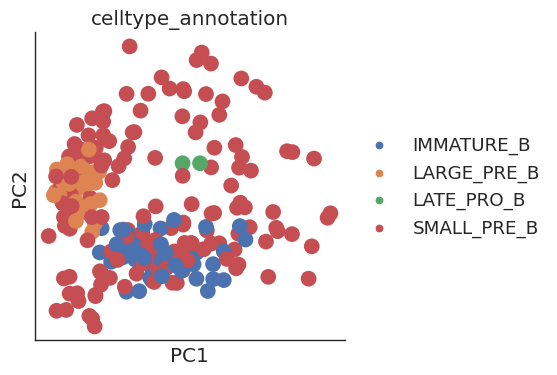

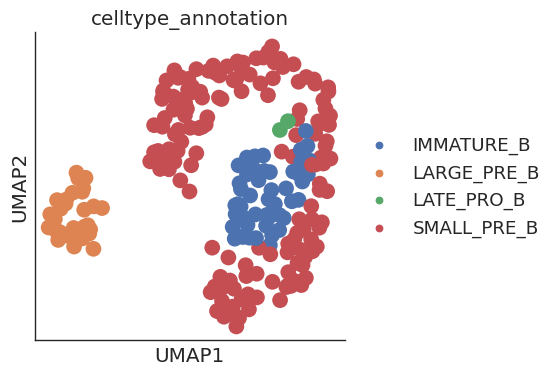

In [139]:
sc.pp.neighbors(GEX_adata, use_rep="X_scvi", n_neighbors=50)
# milo.make_nhoods(GEX_adata, prop=0.1)
milo.make_nhoods(GEX_adata, prop=0.1)
sc.tl.umap(GEX_adata)


pb_GEX_adata = ddl.tl.vdj_pseudobulk(
    GEX_adata, pbs=GEX_adata.obsm["nhoods"], obs_to_take="celltype_annotation", mode="B", extract_cols=None
)


sc.tl.pca(pb_GEX_adata) # compute PCA coordinates, loadings and variance
sc.pl.pca(pb_GEX_adata, color="celltype_annotation")

sc.pp.neighbors(pb_GEX_adata)
sc.tl.umap(pb_GEX_adata)
sc.pl.umap(pb_GEX_adata, color = "celltype_annotation")

In the above example, there are only two neighborhoods corresponding to LATE_PRO_B cells. Because the number of LATE_PRO_B neighborhoods is small, we will start the trajectory using LARGE_PRE_B cells instead of LATE_PRO_B. Also, the trajectory will not change as much since there are only two neighborhoods. 

We also check the `pb_GEX_adata` object for the number of psuedo-bulked cells after filtering.

In [140]:
pb_GEX_adata

AnnData object with n_obs × n_vars = 234 × 180
    obs: 'celltype_annotation', 'celltype_annotation_fraction', 'cell_count'
    uns: 'pca', 'celltype_annotation_colors', 'neighbors', 'umap'
    obsm: 'pbs', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In the following, we select a root cell using the most early progentior B cell. In this example, this would be the LARGE_PRE_B using the prior analysis.

In [141]:
rootcell = pb_GEX_adata[pb_GEX_adata.obs["celltype_annotation"]=="LARGE_PRE_B"].obs_names[
            np.argmin(pb_GEX_adata[pb_GEX_adata.obs["celltype_annotation"]=="LARGE_PRE_B"].obsm["X_umap"][:, 1])
        ]

rootcell

'11'

We select a terminal cell using the most late B cell. In this example, this would be the Immature B cell.

In [142]:
terminal_states = pd.Series(
    ["IMMATURE_B"],
    index=pb_GEX_adata[pb_GEX_adata.obs["celltype_annotation"]=="IMMATURE_B"].obs_names[
        [
            np.argmax(pb_GEX_adata[pb_GEX_adata.obs["celltype_annotation"]=="IMMATURE_B"].obsm["X_umap"][:, 1]),
        ]
    ],
)

terminal_states


175    IMMATURE_B
dtype: object

In [143]:
pb_GEX_adata[pb_GEX_adata.obs["celltype_annotation"]=="IMMATURE_B"].obs_names

Index(['1', '2', '3', '5', '6', '7', '9', '29', '30', '31', '32', '33', '48',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79',
       '89', '97', '116', '117', '161', '162', '163', '164', '167', '168',
       '169', '171', '173', '174', '175', '176', '196', '198', '204', '209',
       '227', '229', '230', '231', '232', '233'],
      dtype='object')

We illustrate the location of the terminal cell and root cell on top of the PCA & UMAP plots.


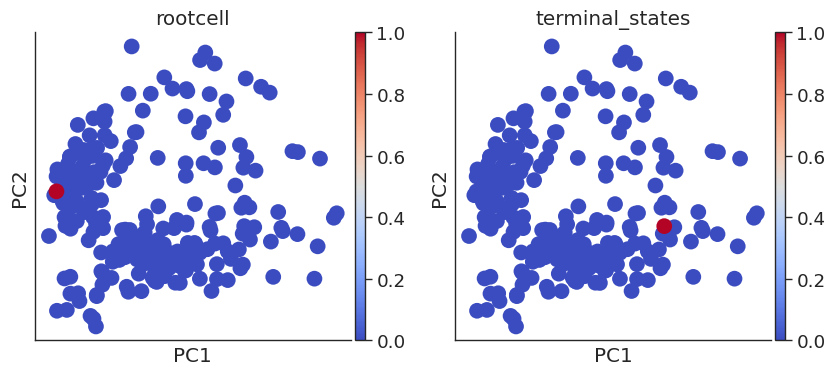

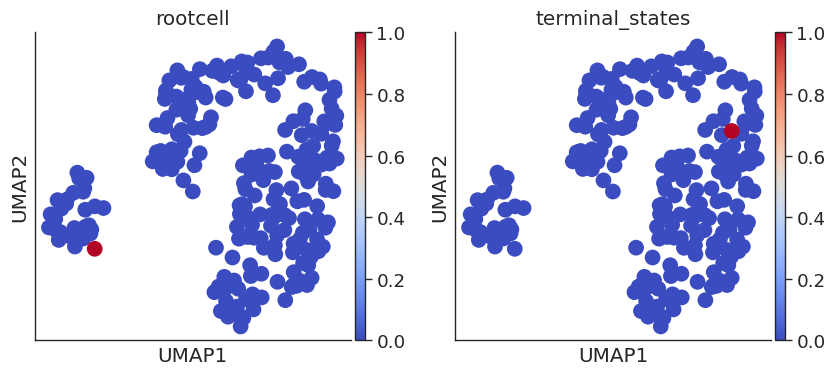

In [144]:
pb_GEX_adata.obs["rootcell"] = 0
pb_GEX_adata.obs["terminal_states"] = 0
pb_GEX_adata.obs.at[str(rootcell), "rootcell"] = 1

pb_GEX_adata.obs.at['175', "terminal_states"] = 1
sc.pl.pca(pb_GEX_adata, color = ["rootcell","terminal_states"], color_map="coolwarm")
sc.pl.umap(pb_GEX_adata, color = ["rootcell", "terminal_states"], color_map="coolwarm")

We generate a diffusion map using Dandelion using the selected rootcell and run pseudotime. The terminal states probabilities column is also renamed to make it easier to understand.

In [145]:
import milopy.core as milo
import palantir


pca_projections = pd.DataFrame(pb_GEX_adata.obsm["X_pca"], index=pb_GEX_adata.obs_names)
dm_res = palantir.utils.run_diffusion_maps(pca_projections, n_components=5)
ms_data = palantir.utils.determine_multiscale_space(dm_res)

pr_res = palantir.core.run_palantir(
    ms_data,
    rootcell,
    num_waypoints=500,
    terminal_states=terminal_states.index,
)

pr_res.branch_probs.columns = terminal_states[pr_res.branch_probs.columns]


Determing nearest neighbor graph...
Sampling and flocking waypoints...
Time for determining waypoints: 0.0006667057673136394 minutes
Determining pseudotime...
Shortest path distances using 30-nearest neighbor graph...


C:\Users\chris\anaconda\lib\site-packages\networkx\convert.py:158: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `from_scipy_sparse_array` instead.


Time for shortest paths: 1.883071533838908 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 0.9999
Correlation at iteration 2: 1.0000
Entropy and branch probabilities...
Markov chain construction...
Computing fundamental matrix and absorption probabilities...
Project results to all cells...


The pseudotime and branching probabilties are transferred into the `pb_GEX_adata.obs` in place. We plot the pseudotime and branching probabilities. 

The start of the trajectory in the pseudotime can be interpreted as starting from 0 to 1. Therefore, the rootcell starts with LARGE_PRE_B and ends with the terminal cell IMMATURE_B. 

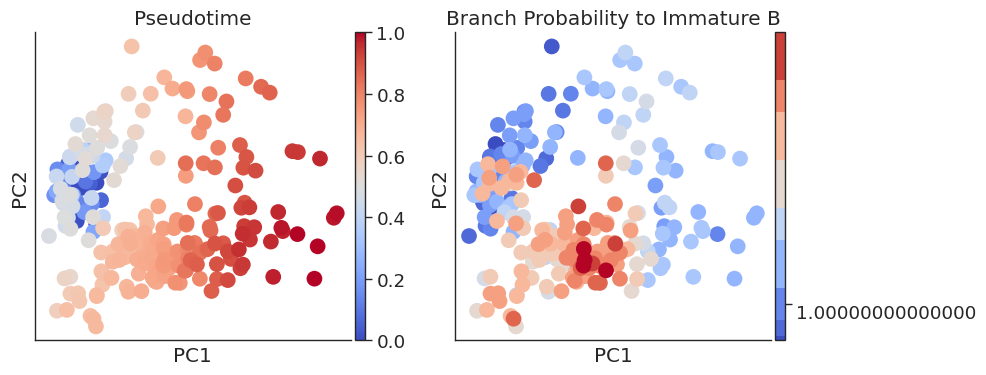

In [146]:
pb_GEX_adata = ddl.tl.pseudotime_transfer(pb_GEX_adata, pr_res)
sc.pl.pca(
    pb_GEX_adata,
    color=["pseudotime", "prob_IMMATURE_B"],
    color_map="coolwarm",
    title=["Pseudotime", "Branch Probability to Immature B"]
)

We then project our pseudotime & branch probabilities from the pseudobulk adata to cell adata. 

number of cells removed due to not belonging to any neighbourhood 6


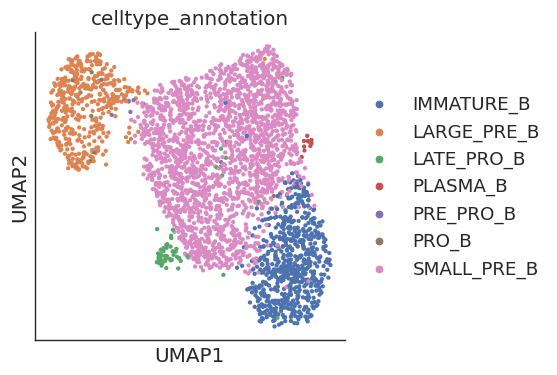

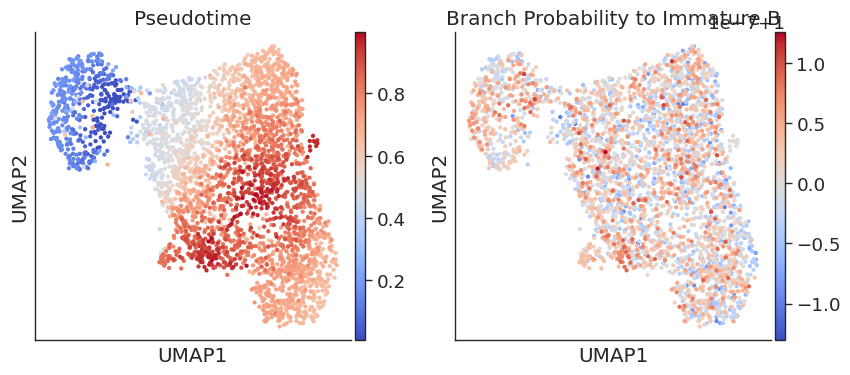

In [147]:
bdata = ddl.tl.project_pseudotime_to_cell(
    GEX_adata, pb_GEX_adata, terminal_states.values
)
sc.pl.umap(bdata, color=["celltype_annotation"])
sc.pl.umap(
    bdata,
    color=["pseudotime", "prob_IMMATURE_B"],
    color_map="coolwarm",
    title=["Pseudotime", "Branch Probability to Immature B"]
)

In [113]:
GEX_adata

AnnData object with n_obs × n_vars = 3147 × 1632
    obs: 'n_counts', 'n_genes', 'file', 'mito', 'doublet_scores', 'predicted_doublets', 'old_annotation_uniform', 'organ', 'Sort_id', 'age', 'method', 'donor', 'sex', 'Sample', 'scvi_clusters', 'is_maternal_contaminant', 'anno_lvl_2_final_clean', 'celltype_annotation', 'filter_rna', 'has_contig', 'filter_contig_quality', 'filter_contig_VDJ', 'filter_contig_VJ', 'contig_QC_pass', 'filter_contig', 'clone_id', 'clone_id_by_size', 'sample_id', 'locus_VDJ', 'locus_VJ', 'productive_VDJ', 'productive_VJ', 'v_call_genotyped_VDJ', 'v_call_genotyped_VJ', 'd_call_VDJ', 'j_call_VDJ', 'j_call_VJ', 'c_call_VDJ', 'c_call_VJ', 'duplicate_count_VDJ', 'duplicate_count_VJ', 'duplicate_count_VDJ_1', 'duplicate_count_VJ_1', 'duplicate_count_VDJ_2', 'duplicate_count_VDJ_3', 'junction_aa_VDJ', 'junction_aa_VJ', 'locus_status', 'locus_status_summary', 'productive', 'productive_summary', 'isotype', 'isotype_summary', 'vdj_status', 'vdj_status_summary', 'constant

IGKC and IGLC2 are genes that form the two types of BCR light chains respectively: kappa and lambda chains.

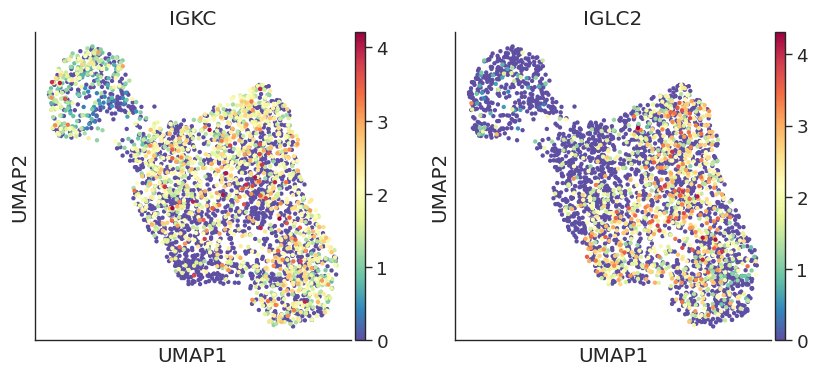

In [124]:
sc.pl.umap(bdata, color = ["IGKC", "IGLC2"])

We attempt to re-run with a different neighborhood size because the amount of cells to cluster is too small. 


In [25]:
preprocessed_GEXdata = sc.read(os.getcwd() + "/write/BCR_contigs.h5ad")

GEX_adata = ddl.tl.setup_vdj_pseudobulk(preprocessed_GEXdata, mode="B",
                                        productive_vdj = False,
                                        productive_vj = False
                                       )

GEX_adata = GEX_adata[~GEX_adata.obs["celltype_annotation"].isin(["CYCLING_B", "B1", "MATURE_B"])] 

In [26]:
sc.pp.neighbors(GEX_adata, use_rep="X_scvi", n_neighbors=50)

In [27]:
milo.make_nhoods(GEX_adata)

(array([ 1.,  1.,  2.,  0.,  2.,  5.,  4.,  4.,  3.,  2.,  2.,  8.,  3.,
         5.,  8.,  4.,  5.,  6.,  3.,  4.,  4.,  7.,  4., 11.,  1.,  1.,
         5.,  2.,  4.,  7.,  6.,  1.,  4.,  0.,  2.,  9.,  7.,  0.,  4.,
         5.,  3.,  5.,  2.,  6.,  3.,  5.,  4.,  1.,  2.,  4.,  2.,  1.,
         2.,  3.,  3.,  3.,  0.,  2.,  4.,  1.,  0.,  1.,  0.,  0.,  4.,
         2.,  1.,  1.,  0.,  0.,  1.,  0.,  2.,  1.,  0.,  0.,  2.,  0.,
         0.,  0.,  2.,  1.,  2.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 56.        ,  57.16999817,  58.34000015,  59.50999832,
         60.68000031,  61.84999847,  63.02000046,  64.19000244,
         65.36000061,  66.52999878,  67.69999695,  68.87000275,
         70.04000092,  71.20999908,  72.37999725,  73.55000305,
         74.72000122,  75.88999939,  77.05999756,  78.23000336,
         79.40000153,  80.56999969,  81.73999786,  82.91000366,
         84.08000183,  85.25      ,  86.41999817, 

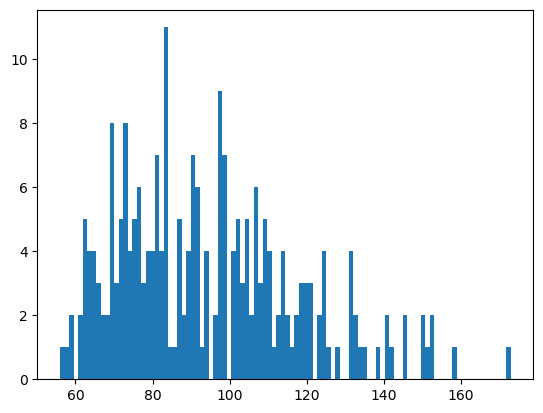

In [28]:
import matplotlib.pyplot as plt
nhood_size = np.array(GEX_adata.obsm["nhoods"].sum(0)).ravel()
plt.hist(nhood_size, bins = 100)

The histogram reveals the peak / mean of the distribution of the neighborhoods is around 75. To push the mean towards the left we need to tweak the parameters and make `n_neighbors=20` and `prop=0.3`. Milopy `make_nhoods()` looks at connectivities to define the neighborhoods. `prop` parameter indicates the fraction of cells to sample for neighbourhood index search. We invoke `sc.pp.neighbors()` to compute the neighborhood graph and `milo.make_nhoods()` to generate the neighborhoods.

In [29]:
GEX_adata = GEX_adata[~GEX_adata.obs["celltype_annotation"].isin(["CYCLING_B", "B1", "MATURE_B", "PRE_PRO_B", "PLASMA_B", "LATE_PRO_B", "PRO_B"])]

In [30]:
sc.pp.neighbors(GEX_adata, use_rep="X_scvi", n_neighbors=20)

In [31]:
milo.make_nhoods(GEX_adata, prop=0.3)

(array([ 2.,  3.,  0.,  7.,  0.,  4.,  0., 14.,  0., 17.,  0., 22.,  0.,
        24.,  0., 25., 26.,  0., 32.,  0., 30.,  0., 29.,  0., 19.,  0.,
        31.,  0., 27.,  0., 22.,  0., 25., 17.,  0., 15.,  0., 22.,  0.,
        16.,  0., 21.,  0., 12.,  0., 11.,  0.,  7.,  0.,  8.,  7.,  0.,
        11.,  0., 11.,  0., 11.,  0.,  3.,  0.,  4.,  0.,  1.,  0.,  2.,
         0.,  1.,  3.,  0.,  0.,  0.,  2.,  0.,  3.,  0.,  2.,  0.,  2.,
         0.,  2.,  0.,  1.,  0.,  0.,  3.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([19.        , 19.53000069, 20.05999947, 20.59000015, 21.12000084,
        21.64999962, 22.18000031, 22.70999908, 23.23999977, 23.77000046,
        24.29999924, 24.82999992, 25.36000061, 25.88999939, 26.42000008,
        26.95000076, 27.47999954, 28.01000023, 28.54000092, 29.06999969,
        29.60000038, 30.12999916, 30.65999985, 31.19000053, 31.71999931,
        32.25      , 32.77999878, 33.31000137, 33.84000015, 34.369998

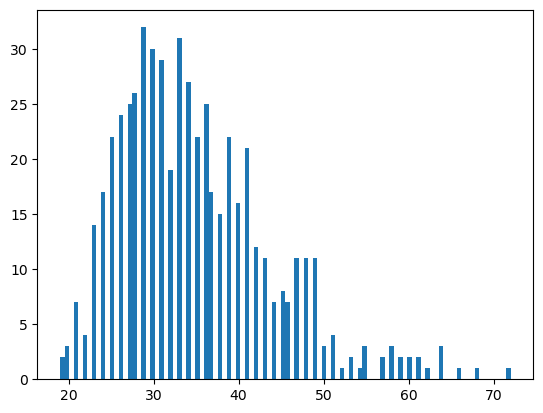

In [32]:
nhood_size = np.array(GEX_adata.obsm["nhoods"].sum(0)).ravel()
plt.hist(nhood_size, bins = 100)

In [33]:
GEX_adata.obsm["nhoods"]

<3055x560 sparse matrix of type '<class 'numpy.float32'>'
	with 19534 stored elements in Compressed Sparse Row format>

In [34]:
pb_GEX_adata = ddl.tl.vdj_pseudobulk(
    GEX_adata, pbs=GEX_adata.obsm["nhoods"], obs_to_take="celltype_annotation", mode="B", extract_cols=None
)


C:\Users\chris\anaconda\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.


C:\Users\chris\anaconda\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


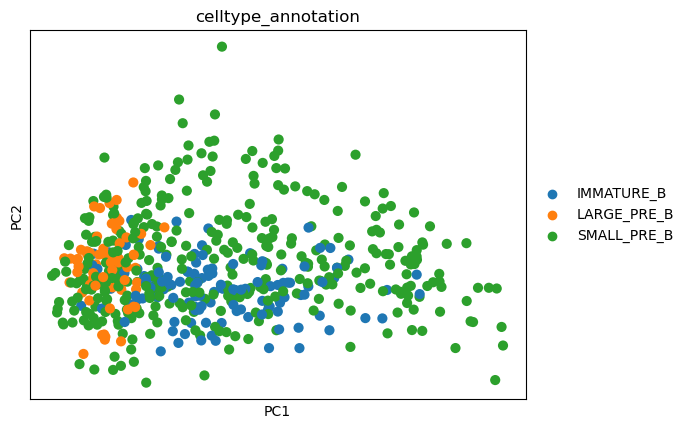

C:\Users\chris\anaconda\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


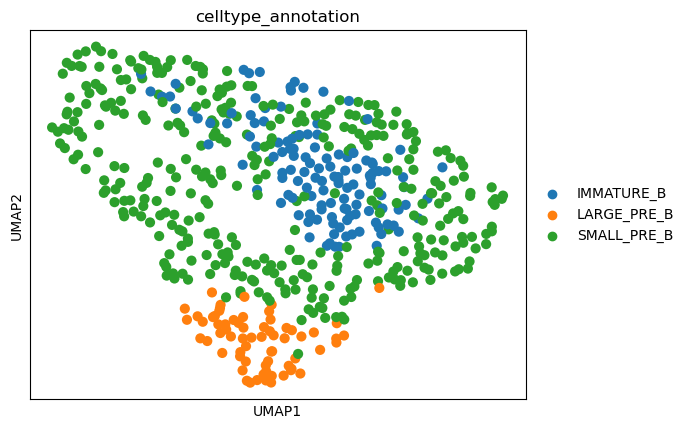

In [35]:
sc.tl.pca(pb_GEX_adata) # compute PCA coordinates, loadings and variance
sc.pl.pca(pb_GEX_adata, color="celltype_annotation")

sc.pp.neighbors(pb_GEX_adata)
sc.tl.umap(pb_GEX_adata)
sc.pl.umap(pb_GEX_adata, color = "celltype_annotation")

We pick a new rootcell and terminal cell to generate the diffusion maps. We want to pick the rootcell and terminal cell so that they are far apart as possible.

In [36]:
# pick rootcell
# rootcell = GEX_adata.obs.iloc[np.argmax(GEX_adata[GEX_adata.obs["celltype_annotation"]=="LARGE_PRE_B"].obsm["X_pca"][:, 1])]
# rootcell = np.where(pb_GEX_adata[pb_GEX_adata.obs["celltype_annotation"]=="LARGE_PRE_B"].obsm["X_pca"][:, 0])
rootcell = np.argmin(np.where(pb_GEX_adata[pb_GEX_adata.obs["celltype_annotation"]=="LARGE_PRE_B"].obsm["X_pca"][:, 1]))
rootcell

0

We can also check the rootcell directly.

In [37]:
pb_GEX_adata.obs.iloc[rootcell]

celltype_annotation             LARGE_PRE_B
celltype_annotation_fraction            1.0
cell_count                             33.0
Name: 0, dtype: object

In [420]:
pb_GEX_adata.obs.head()

,celltype_annotation,celltype_annotation_fraction,cell_count,rootcell,terminal_states
0,LARGE_PRE_B,1.000000,33.0,1,0
1,LARGE_PRE_B,1.000000,21.0,0,0
2,IMMATURE_B,1.000000,31.0,0,0
3,SMALL_PRE_B,1.000000,29.0,0,0
4,SMALL_PRE_B,0.645161,31.0,0,0


In [435]:
pb_GEX_adata.obs['celltype_annotation']

0      LARGE_PRE_B
1      LARGE_PRE_B
2       IMMATURE_B
3      SMALL_PRE_B
4      SMALL_PRE_B
          ...     
555     IMMATURE_B
556     IMMATURE_B
557     IMMATURE_B
558     IMMATURE_B
559     IMMATURE_B
Name: celltype_annotation, Length: 560, dtype: category
Categories (3, object): ['IMMATURE_B', 'LARGE_PRE_B', 'SMALL_PRE_B']

In [398]:
# pb_GEX_adata[pb_GEX_adata.obs["celltype_annotation"]=="LARGE_PRE_B"].obsm["X_pca"]
pb_GEX_adata[pb_GEX_adata.obs["celltype_annotation"]=="LARGE_PRE_B"]


View of AnnData object with n_obs × n_vars = 66 × 177
    obs: 'celltype_annotation', 'celltype_annotation_fraction', 'cell_count', 'rootcell', 'terminal_states'
    uns: 'pca', 'celltype_annotation_colors', 'neighbors', 'umap', 'DM_EigenValues'
    obsm: 'pbs', 'X_pca', 'X_umap', 'DM_EigenVectors'
    varm: 'PCs'
    obsp: 'distances', 'connectivities', 'DM_Kernel', 'DM_Similarity'

In [339]:
# pick terminal state
terminal_states = pd.Series(
    ["IMMATURE_B"],
    index=pb_GEX_adata[pb_GEX_adata.obs["celltype_annotation"]=="IMMATURE_B"].obs_names[
        [
            np.argmax(pb_GEX_adata[pb_GEX_adata.obs["celltype_annotation"]=="IMMATURE_B"].obsm["X_pca"][:, 0]),
        ]
    ],
)

terminal_states

285    IMMATURE_B
dtype: object

We plot the terminal cell and root cell on top of PCA and UMAP to visualise which cell we are selecting for the trajectory analysis. We then compare with the celltype_annotation plot to make sure the right neighborhood cells are chosen.


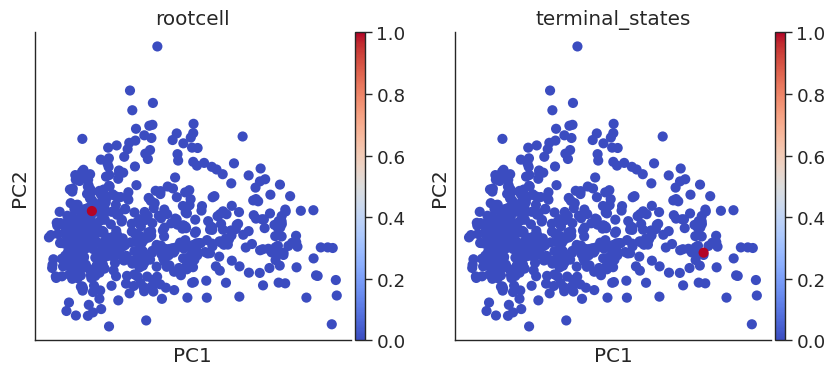

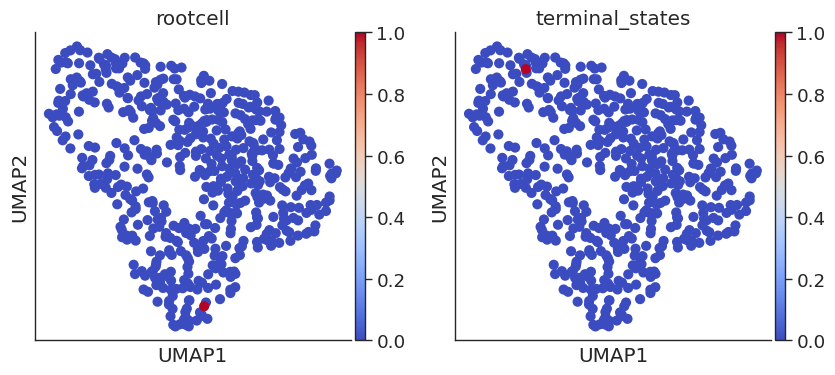

In [408]:
pb_GEX_adata.obs["rootcell"] = 0
pb_GEX_adata.obs["terminal_states"] = 0
pb_GEX_adata.obs.at['0', "rootcell"] = 1

pb_GEX_adata.obs.at['285', "terminal_states"] = 1
sc.pl.pca(pb_GEX_adata, color = ["rootcell","terminal_states"], color_map="coolwarm")
sc.pl.umap(pb_GEX_adata, color = ["rootcell", "terminal_states"], color_map="coolwarm")

In [421]:
sc.pp.pca(pb_GEX_adata)

In [449]:
# Run diffusion maps
pca_projections = pd.DataFrame(pb_GEX_adata.obsm["X_pca"], index=pb_GEX_adata.obs_names)
dm_res = palantir.utils.run_diffusion_maps(pca_projections, n_components=5)
ms_data = palantir.utils.determine_multiscale_space(dm_res)



Determing nearest neighbor graph...


In [450]:
ms_data

""
0
1
2
3
4
...
555
556
557
558


In [359]:
pb_GEX_adata.obs_names[60]

'60'

In [445]:
pr_res = palantir.core.run_palantir(
    ms_data,
    pb_GEX_adata.obs_names[rootcell],
    num_waypoints=500,
    terminal_states=terminal_states.index,
)

#pr_res.branch_probs.columns = terminal_states2[pr_res.branch_probs.columns]

ValueError: at least one array or dtype is required